## Contents of the file

#### 1.Overview
#### 2.Preparatory Tasks
#### 3.Data Cleaning
#### 4.Data Correlation
#### 5.Exploratory Data Analysis
#### 6.Hypothesis Testing
#### 7.Modelling
#### 7.Choosing the best Model
#### 8.Summary
#### 9.References

## Overview

For this project, the dataset used is PAMAP2 which is called as Physical Activity Monitoring dataset that contains data of 18 different physical activities (such as walking, cycling, playing soccer etc) performed by 9 subjects wearing 3 inertial measurement units (IMU) and a heart rate monitor. This data is stored in individual text files per subject. Each row in each file represents one reading and contains 54 attributes (including timestamp, activity ID, heart rate and IMU sensory data). 

Assuming the goal is to develop hardware and/or software which can determine the amount (using start/end times and heart rates) and type of physical activity carried out by an individual, and the actionable insights that can be derived from the dataset.

The three specific requirements of this project are to:
1.	Carry out thoroughly exploratory data analysis and appropriately handle missing or dirty data
2.	Develop and tests at least one hypothesis for a relationship between a single pair of attributes
3.	Develop and test at least one model which uses multiple attributes to make predictions

## Preparatory Tasks

First, we have to import the required python libraries such as matplotlib, pandas, numpy, math, sklearn in order to be able to run the codes later on in the jupyter notebook.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

Loading always comes next, in this section we will load the data from the dataset. The data is loaded from the Protocol folder that is attached within the submitted zip file and the jupyter notebook.

A list of the file names has to be created in order to be able to load all the files and create the dataframe. Moreover, a dictionary that will hold the names as numbers for each different activity has to be created to be able to understand which activity is being analyzed at each phase. Here, the dictionaries are 'transient', 'lying', 'sitting', 'standing', 'walking', 'running', 'cycling', 'Nordic_walking', 'watching_TV', 'computer_work', 'car driving', 'ascending_stairs', 'descending_stairs', 'vacuum_cleaning', 'ironing', 'folding_laundry', 'house_cleaning', 'playing_soccer', 'rope_jumping'.

Lists for every different category of IMU's need to be put together as well to have the column names for the dataframe. Here, the column names are timestamp, activityID, heartrate. IMU's that will be used is for the chest, ankle, and hand are Temperature, Acceleration 16_1, Acceleration 16_2, Acceleration 16_3, Acceleration 6_1, Acceleration 6_2, Acceleration 6_3, Gyroscope 1, Gyroscope 2, Gyroscope 3, Magnetometer 1, Magnetometer 2, Magnetometer 3, Orientation 1, Orientation 2, Orientation 3, Orientation 4. Then all the various lists have to be put together to create the collection of the columns.

In [2]:
# Load data
proto_files = ['Protocol/subject101.dat',
                 'Protocol/subject102.dat',
                 'Protocol/subject103.dat',
                 'Protocol/subject104.dat',
                 'Protocol/subject105.dat',
                 'Protocol/subject106.dat',
                 'Protocol/subject107.dat',
                 'Protocol/subject108.dat',
                 'Protocol/subject109.dat' ]

subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
                  1: 'lying',
                  2: 'sitting',
                  3: 'standing',
                  4: 'walking',
                  5: 'running',
                  6: 'cycling',
                  7: 'Nordic_walking',
                  9: 'watching_TV',
                  10: 'computer_work',
                  11: 'car driving',
                  12: 'ascending_stairs',
                  13: 'descending_stairs',
                  16: 'vacuum_cleaning',
                  17: 'ironing',
                  18: 'folding_laundry',
                  19: 'house_cleaning',
                  20: 'playing_soccer',
                  24: 'rope_jumping' }

colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list

len(columns)

54

In [3]:
df = pd.DataFrame()
for file in proto_files:
    procData = pd.read_table(file, header=None, sep='\s+')
    procData.columns = columns
    procData['subject_id'] = int(file[-5])
    df = df.append(procData, ignore_index=True)

df.reset_index(drop=True, inplace=True)
df.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


In [4]:
df.columns

Index(['timestamp', 'activityID', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'subject_id'],
      dtype=

From the above outputs it shows that from the sample of the dataframe that we have produced needs some data cleaning. So here the data cleaning starts with removing the activityID = 0 from the dataset since this is transient period where the subject was not doing any particular activity as discussed in the readme file that was given and also the null values have to be eliminated. Further in next section, all the procedure and steps of data cleaning is explained.

## Data Cleaning

In order to preserve the result of the data analysis, the missing data has to be accounted for and formatted in a planned manner. Moreover, each different activity has 8 or less subjects, and each subject did the activity, and every different activity has NaN values for various subjects. Therefore, some data filling has to be applied on the dataset. As for the NaN values in our data, it is best to use interpolate.

Interpolation is a technique in Python used to estimate unknown data points between two known data points. Interpolation is mostly used to impute missing values in the dataframe or series while pre-processing data. 

Here, DataFrame is a widely used python data structure that stores the data in form of rows and columns. When performing data analysis we always store the data in a table which is known as a dataframe. 

So, we can use Interpolation to find missing value with help of its neighbours. When imputing missing values with average does not fit best, we have to move to a different technique and the technique most people find is Interpolation. To perform all Interpolation methods, we will create a pandas series with some NaN values and try to fill missing values with different methods of Interpolation.

As a guideline for the code written below, interpolation happens after removing 'activity 0' as it has very noisy and would data which would impact the output massively as the values given in heart rate would not be produced from the data point set that is of activities that actually matter.

In [5]:
def dataCleaning(dataCollection):
        dataCollection = dataCollection.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                                              'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                                              'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
                                               axis = 1)  # removal of orientation columns as they are not needed
        dataCollection = dataCollection.drop(dataCollection[dataCollection.activityID == 0].index) #removal of any row of activity 0 as it is transient activity which it is not used
        dataCollection = dataCollection.interpolate() #removal of any remaining NaN value cells by constructing new data points in known set of data points
        
        return dataCollection

In [6]:
data = dataCleaning(df)

In [7]:
data.reset_index(drop = True, inplace = True)
data.head(10)

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
5,37.71,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,...,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1
6,37.72,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,...,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1
7,37.73,1,100.0,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,...,9.61685,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,1
8,37.74,1,100.0,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,...,9.61686,-1.72212,0.326234,0.039346,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,1
9,37.75,1,100.0,30.375,2.14107,7.52262,5.78141,2.31538,7.72276,5.78828,...,9.63189,-1.70699,0.326105,0.029874,-0.010763,0.005133,-60.7680,-37.4206,-58.8735,1


From the above output, the reason why heartrate still has NaN values is that interpolation calculates the values around the NaN cell. Since the primary cells are NaN it's normal to get new NaN values after interpolation. To beat this problem we will assume that the worth of the primary 4 cells is 100 since the values after index 4 are 100. Doing so we can eliminate any NaN values from our dataset.

In [8]:
data.isnull().sum()

timestamp           0
activityID          0
heartrate           4
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

Here in the above output, the reason why HR still has nan values is that the interpolation calculates the values around the NaN cell. Since the primary cells are NaN it's normal to get new values after interpolation. To beat this problem, we will assume that the worth of the primary 4 cells is 100 since the values after index 4 are 100.

In [9]:
for i in range(0,4):
    data["heartrate"].iloc[i]=100

C:\Users\rky42\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


After the above output, there are no missing values but to reassure fully we can check it by executing the next code as given below. Eliminating the null values is essential for the program as to avoid destabilizing the model at a later stage.

In [10]:
data.isnull().sum()

timestamp           0
activityID          0
heartrate           0
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

After getting the output, stating the there are no null values, we can move onto the next stage which is Exploratory Data Analysis.

## Exploratory Data Analysis

### Splitting Data in Train and Test sets

We have to split the data into train and test sets. As the name suggests, the train set is used to train the model at a later stage and the test set will be used to validate the model after it has been fitted. The key advantage of splitting the dataset is to estimate how well the “learned” model will simplify new data. By doing this, we will find the model hyper-parameter and also evaluate the performance.

We need to first check if the classes are well-adjusted, which would imply if the classification is not needed for the split. This needs to be done before splitting the data into the train test groups. We also need to stratify while splitting the data, in case the class weights are imbalanced. The process of taking samples of all the classes and then putting them on the train and test set sub-sets is what stratifying of the sample does. It helps with getting better outcomes when the distribution of the weights of the classes is not normal. Normal distribution would infer that each class weight is similar with all other weights of classes.

### See class distribution/ration
Here we check if our dataset is balanced

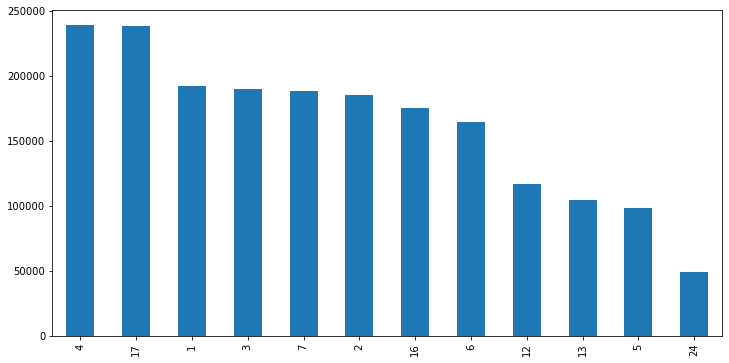

In [11]:
data['activityID'].value_counts().plot(kind = "bar",figsize = (12,6))
plt.show()

The above plot suggests the classes are mostly balanced. Therefore, we can now proceed with splitting the data into the respective train and test sets. The most common split in the industry is 80% split for the train set and 20% for the test set which is the split fraction that will be used for this project and also a random state of 1 is used in order to get similar results every time the code is executed.

In [12]:
train_df = data.sample(frac=0.8, random_state=1)
test_df = data.drop(train_df.index)

Using pandas, we can gain some insight and also use statistics to further understand the data and also plan ahead as to how to proceed (or) the process to be followed to process the data for further analysis.

In [13]:
train_df.describe()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
count,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,...,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06,1.554298e+06
mean,1.705049e+03,8.080534e+00,1.074758e+02,3.275138e+01,-4.953526e+00,3.581113e+00,3.603514e+00,-4.886385e+00,3.570863e+00,3.787763e+00,...,9.374706e+00,-4.445267e-02,-2.175620e+00,1.027736e-02,-3.649406e-02,5.607242e-03,-3.157962e+01,1.394841e+00,1.725137e+01,4.566578e+00
std,1.093592e+03,6.175064e+00,2.699031e+01,1.794207e+00,6.239143e+00,6.886169e+00,3.958145e+00,6.245060e+00,6.585066e+00,3.945398e+00,...,6.067489e+00,7.183548e+00,3.475628e+00,1.126197e+00,6.380780e-01,2.011908e+00,1.834688e+01,2.168353e+01,1.969368e+01,2.333375e+00
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.121470e+01,-6.184170e+01,-6.193470e+01,...,-6.114200e+01,-6.190350e+01,-6.231480e+01,-1.416200e+01,-1.304010e+01,-1.401960e+01,-1.726240e+02,-1.379080e+02,-1.027160e+02,1.000000e+00
25%,7.442925e+02,3.000000e+00,8.600000e+01,3.168750e+01,-8.970020e+00,1.057830e+00,1.162090e+00,-8.867070e+00,1.055563e+00,1.365070e+00,...,8.396590e+00,-2.073120e+00,-3.399390e+00,-2.081648e-01,-1.066463e-01,-4.416657e-01,-4.170160e+01,-1.246927e+01,3.799632e+00,2.000000e+00
50%,1.480090e+03,6.000000e+00,1.040000e+02,3.312500e+01,-5.449130e+00,3.525300e+00,3.432840e+00,-5.377104e+00,3.566820e+00,3.663470e+00,...,9.550020e+00,-2.252810e-01,-1.993145e+00,4.636280e-03,-3.977450e-03,-2.336400e-03,-3.400060e+01,7.672570e-01,1.876795e+01,5.000000e+00
75%,2.664000e+03,1.300000e+01,1.240000e+02,3.406250e+01,-9.581007e-01,6.450508e+00,6.532445e+00,-9.061720e-01,6.458267e+00,6.778200e+00,...,1.028160e+01,1.920960e+00,-5.958823e-01,1.308070e-01,1.160640e-01,9.121635e-02,-1.789610e+01,1.782927e+01,3.120910e+01,7.000000e+00
max,4.245680e+03,2.400000e+01,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.192340e+01,...,6.196930e+01,6.204900e+01,6.093570e+01,1.742040e+01,1.358820e+01,1.448270e+01,9.155160e+01,9.369920e+01,1.469000e+02,9.000000e+00


The describe() method is employed for calculating some statistical data like percentile, mean and std of the numerical values of the Series or Data Frame. It examines both numeric and object series and also the info data frame column sets of mixed data types. After running the describe() code, it's clear that the heart rate monitor is extremely precise, and hence, we'll focus on it to track the subjects during their activities as implied. From the table above, we observe that the mean pulse is 107.4bpm, and also the minimum pulse is at 57 bpm and therefore the maximum pulse has been up to 202 bpm. The quartiles that are shown are often further analysed by plotting a box plot which can help with understanding our outliers and quartiles groups and also shown the mean of our data's heart rate.

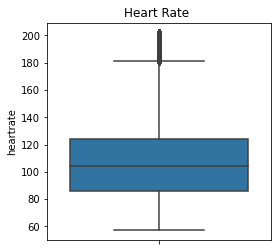

In [14]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Heart Rate ")
ax = sns.boxplot(y = train_df["heartrate"])

In descriptive statistics, a boxplot is a way of graphically demonstrating the locality, spread and skewness of groups of arithmetic data through their quartiles. From the box plot above, we observe that the outliers have heart rate from 180 all the way up to 202. Our highest quartile group out of the four starts from 124 which is the end of the Inter-quartile range and finishes at 180 which also makes it our biggest group by looking at the size of it on the box plot compared to the other quartiles. Meaning that the biggest number of subjects on the activities performed had heart rate of 124 up to 180. Our third quartile group starts from the mean value which is 107.4 which is where the horizontal line in our box is, and finishes at the end of the Inter-quartile range which is 124. Our second quartile group, starts from the start of the Inter-quartile range which is 86 and ends at the mean value 124. Our first quartile group starts from the lowest data point, 57 and ends at the start of the Inter-quartile range 86. Our box plot also shows that most subjects performed some activities at a statistically similar way but failed to do the same in all activities which explains the big upper quartile group.

In order to gain insight on the most tiresome activities among the group, we have to plot a bar graph that will display the mean values of the heart rate with respect to the activities performed. This will in turn allow us to analyse the specific activity data in much more detail. Here, we have used the names of the activity, so that it’s a lot easier to analyse the results.

<AxesSubplot:xlabel='activityID'>

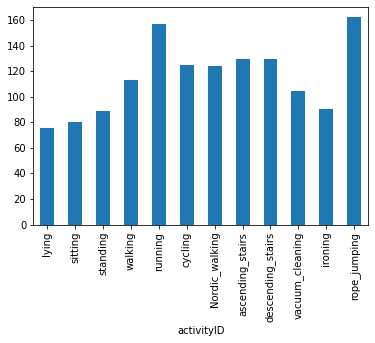

In [15]:
df_hr_act = train_df['heartrate'].groupby(train_df['activityID']).mean()
df_hr_act.index = df_hr_act.index.map(activityIDdict)
df_hr_act.plot(kind='bar')

It can be observed that the rope jumping and running activities are the most cumbersome out of the rest as the values of the heart rate monitor are higher than usual here.

To check on the data for abnormalities, we will have to plot a heat map. The heat map is a two-dimensional representation of data in which the values are represented by colours. The darker the colour, the more similar the data is. Using the heat map, we will be able to determine the similarities between the data columns and hence, all the columns will be used to understand the range of problems, if there are any.

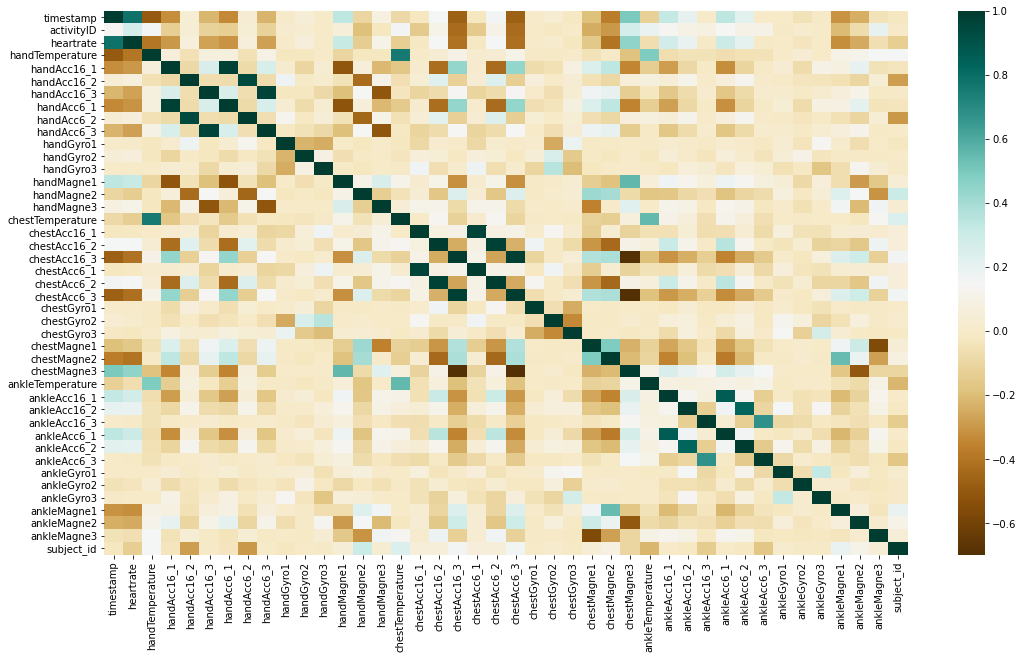

In [16]:
from pandas.plotting import scatter_matrix
df_corr = train_df.corr()
df_corr = df_corr.drop(['activityID'], axis = 1)

f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

The heatmap show the statistical similarities between all the columns of data, and we can conclude that the gyroscope data doesn’t correlate with any other data and are not of any significance to us for further analysis of the data.

There is also a corelation between the data acquired by the accelerometer of the hand and the temperature, as the two are strongly corelated on the hand accelerometer on all three occasions.

It can also be observed that the chest magnetometer is correlated to the heart rate which is quite expected as they are located very close together on the body within the same region.

## Hypothesis Testing

A statistical hypothesis test is a method of statistical inference used to determine a possible conclusion from two different, and likely conflicting, hypotheses.

In a statistical hypothesis test, a null hypothesis and an alternative hypothesis is proposed for the probability distribution of the data. If the sample obtained has a probability of occurrence less than the pre-specified threshold probability, the significance level, given the null hypothesis is true, the difference between the sample and the null hypothesis is deemed statistically significant. The hypothesis test may then lead to the rejection of null hypothesis and acceptance of alternate hypothesis.

From the bar chart that is plotted above, the most tiring activities are running and rope jumping. Hence, the hypothesis testing is going to be supported by these two activities and also the heart rate data corelates with the rest of the activity’s heart rate. This may be achieved by getting the mean heart rate of the two activities and then comparing them to the mean heart rate of all the other activities.

The most cumbersome activities seem to be running and rope jumping as seen from bar charts plotted above. Therefore, our hypothesis testing is going to be supported these two activities and the way their heart rate data correlates with the remaining of the activities' heart rates. This may be done by getting the mean heart rate of the two activities and them comparing it to the mean heart rate of all the other activities.

### Null Hypothesis:

- h0 : The mean heart rate of the cumbersome activities has no mass difference from the mean of all activities

### Alternate Hypothesis:

- h1 : The mean heart rate of the cumbersome activities has mass difference from the mean of all activities

In [17]:
running_data = train_df.loc[(train_df["activityID"] == 5)]
jump_rope_data = train_df.loc[(train_df["activityID"] == 24)]
cumbersome_data = running_data + jump_rope_data

In [18]:
import scipy.stats

p = train_df['heartrate'].mean() / (running_data['heartrate'].std() / math.sqrt(running_data['heartrate'].count()))
pValue = 1 - scipy.stats.norm.cdf(p)

if pValue > 0.1:
    print("The p_value is ", pValue, " and h1 is rejected. There is no mass difference between the means of cumbersome activities and all activities.")
else:
    print("The p_value is ", pValue, " and h0 is rejected. There is mass difference between the means of cumbersome activities and all activities.")

The p_value is  0.0  and h0 is rejected. There is mass difference between the means of cumbersome activities and all activities.


After making sure that our hypothesis is alternate, proving that the mean of the heart rate of the two most cumbersome activities is in fact very different from the mean heart rate of all the activities. Now, we can move on into Modelling where we will be looking at various modelling algorithms and will be choosing one of them as the modelling algorithm that would be used after testing.

## Modelling

Data modelling is the process of producing a descriptive diagram of relationships between various types of information that are to be stored in a database. One of the goals of data modelling is to create the most efficient method of storing information while still providing for complete access and reporting. Modelling will provide us with information such as the definition of the data elements, but also the structures and the relationship between them.

We will first drop a few variables which can impact modelling precision. The variables that needs to be dropped are timestamp and subject_id as they are numeric numbers which would our modelling method would use in its calculations but since their values don't have any meaning, the modelling method used would have noise and predictions of accuracy would be imprecise.

Robust Scaler is then fitted on to the train and test sets. This scaler removes the median and scales the data according to the quantile range. Standardization of a dataset is a common requirement for many machine learning estimators. Typically, this is done by removing the mean and scaling to unit variance. However, the outliers can influence the sample mean or variance in a negative way. In such cases, the median and interquartile range provide better results.

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [20]:
train_df = train_df.drop(["timestamp", "subject_id"], 1)

In [21]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler

#Applying scaling to all columns except subject and activity 
rscaler = RobustScaler()
df_scaled_train = train_df.copy()
df_scaled_test = test_df.copy()

df_scaled_train.iloc[:, 1:41] = rscaler.fit_transform(df_scaled_train.iloc[:, 1:41])
df_scaled_test.iloc[:, 1:41] = rscaler.fit_transform(df_scaled_test.iloc[:, 1:41])

df_scaled_train.head()

,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,...,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3
312921,3,-0.368421,0.447368,-0.384512,0.220069,-0.572507,-0.361436,0.256971,-0.530520,-0.012729,...,0.321939,0.088339,-0.322152,0.351800,0.220183,0.001165,-0.139354,0.641700,-0.582432,0.658114
141735,12,1.681818,0.236842,-0.721708,-0.103407,-0.206281,-0.625117,-0.108947,-0.253147,-0.868631,...,0.020813,0.842160,-0.269519,-0.185601,-0.829881,3.024896,-0.265261,-0.744416,1.091512,-0.924482
1191085,24,2.026316,0.289474,0.457975,0.035504,-2.015047,0.603512,0.072534,-1.452154,-5.190897,...,1.905139,-7.260794,-0.946788,1.482238,5.524513,-0.773631,-1.222988,-0.447203,-0.428537,-0.674781
1206914,1,-1.105263,0.131579,1.290689,-0.693932,0.901352,1.320385,-0.723956,0.911347,0.065061,...,-0.351884,-5.128883,-2.300004,-0.300736,-0.037313,0.027350,0.037709,0.700615,0.847494,-0.859194
1710520,2,-0.657895,0.500000,0.434876,-2.413007,-0.473610,0.449008,-2.412753,-0.481267,-0.015890,...,-0.107595,-0.192439,0.783229,-0.057162,0.016440,0.068780,0.058657,0.611770,0.497042,0.263863


In [22]:
X_train = df_scaled_train.drop('activityID', axis=1).values
y_train = df_scaled_train['activityID'].values

# Test Dataset
X_test = df_scaled_train.drop('activityID', axis=1).values
y_test = df_scaled_train['activityID'].values

### Dimensionality reduction using Principal Component Analysis(PCA)

**Principal component analysis (PCA)** is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

PCA is used in exploratory data analysis for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data. The $i$-th principal component can be taken as a direction orthogonal to the first $i-1$ principal components that maximizes the variance of the projected data.

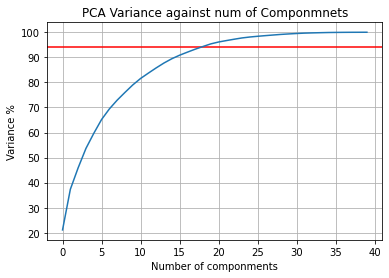

In [23]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against num of Componmnets")
plt.ylabel("Variance %")
plt.xlabel("Number of componments")
l = plt.axhline(94, color="red")

plt.plot(var1)
plt.grid()

Usually, 90-98% of the variance will explain our data rather well. So, by plotting the variance ratio against the number of components we could see what percentage of these we could use. As we see from the graph above 15 components fall around to 94% of the variance.

In [24]:
pca = PCA(n_components=17)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

## Choosing the best Model

Finally in this section, we are going to train two models and check their performance.

Here, we are going to focus on two modelling algorithms, Random Forest and Logistic Regression.

A **Random Forest** is a machine learning technique that’s used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems.
A random forest algorithm consists of many decision trees. The ‘forest’ generated by the random forest algorithm is trained through bagging or bootstrap aggregating. Bagging is an ensemble meta-algorithm that improves the accuracy of machine learning algorithms.
The (random forest) algorithm establishes the outcome based on the predictions of the decision trees. It predicts by taking the average or mean of the output from various trees. Increasing the number of trees increases the precision of the outcome.

**Logistic Regression** is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression[1] (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1".
It is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problem. Its basic fundamental concepts are also constructive in deep learning. Logistic regression describes and estimates the relationship between one dependent binary variable and independent variables.

In [25]:
def get_metrics (y_true,y_pred):
    acc = accuracy_score(y_true, y_pred)
    err = 1-acc
    p = precision_score(y_true, y_pred,average=None).mean()
    r = recall_score(y_true, y_pred, average=None).mean()
    f1 = f1_score(y_true, y_pred, average=None).mean()
   
    print("Accuracy: ",acc)
    print("Error: ",err)
    print("Precision", p)
    print("Recall", r)
    print("F1", f1)
    

log_reg = LogisticRegression()
log_reg.fit(X=X_train, y=y_train )
y_pred_lr = log_reg.predict(X_test)
get_metrics(y_test, y_pred_lr)

C:\Users\rky42\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.49290354874033165
Error:  0.5070964512596683
Precision 0.47147056722517705
Recall 0.42373997270797775
F1 0.42171126577129797


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs =4)
rfc.fit(X_train,y_train)
y_pred_rf = rfc.predict(X_test)
get_metrics(y_test,y_pred_rf)

Accuracy:  0.9999961397363955
Error:  3.860263604549274e-06
Precision 0.9999970484471578
Recall 0.9999969523123854
F1 0.999997000371916


##  Cross Validation

**Cross-validation** is a statistical method used to estimate the performance (or accuracy) of machine learning models. It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited. In cross-validation, you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.

Even though the above models seem to perform really good, the metrics used for that do not represent the real score since the models were train on a specific part of the dataset. By using cross validation, we could k=10 number of folds, which in few words, will generate 10 different samples. By doing that we will get 10 different metrics values. The mean value of these metrics will show a better representation of our model's performance

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

classifiers = [LogisticRegression(solver='lbfgs', max_iter = 1000), RandomForestClassifier(n_jobs = 4)]

score_lst = []
for cls in classifiers:
    accs  = accuracy_score(y_train, cross_val_predict(cls,X_train,y_train, cv = 10))  #cross validate the accurancy 
    scores = cross_val_score(cls,X_train,y_train,scoring = "neg_mean_squared_error",cv = 10)#calcuate the error
    score = np.sqrt(-scores)
    f1 = cross_val_score(cls,X_test, y_test,scoring = "f1_macro", cv =10)
    
#   p = cross_val_score(cls,X_test, y_test,scoring = "average_precision", cv =10)
#   r = recall_score(y_true, y_pred, average=None).mean()
#   f1 = f1_score(y_true, y_pred, average=None).mean()
    score_lst.append([cls.__class__.__name__,accs,score.mean(), f1.mean()])

df_scores=pd.DataFrame(columns = ["Classifier","Accurancy","MSE","F1"],data =  score_lst)
display(df_scores)

The above code takes a lot of time to run on the system that I have as it doesn't have the computational power to execute the code. But there are no errors in the code, and it should be able to run on a better speced system.

## Summary

The goal of the project is to gain insights on how active an individual is based on the physical activities he/she undertakes. In order to perform the analysis on the data, a certain procedure, and plan had to be set in mind to be able to get as much data as possible from the provided resources. After loading the data, the null values have to be removed from the dataset to avoid corrupting the analysis results. Data cleaning was performed on the data, and all the null values as well as the dirty data has been removed or worked upon. The IMU “Orientation” data column has been eliminated completely as it is not useful to gain an insight on the performance of the subjects.

After cleaning the data and eliminating the null values, EDA is performed. First, the balance of the data distribution is confirmed in order to determine whether stratification is required or not in the split. For this, a bar graph of the activityID vs value counts is drawn, and it can be concluded that the classes are mostly balanced, and the split can be performed. Various plots are drawn to gain insight on the data distribution as well as similarities between different columns. A conclusion is drawn that the most cumbersome activities seem to be running and rope jumping, as observed from the bar chart. Therefore, the hypothesis testing that is to be performed will be based on these activities along with the data from the heart rate monitor. After taking the p-value, it was understood that the mean heart rate of running and rope jumping has no adverse effect on the mean of all the activities because it was a non-null hypothesis.

In order to model the data, some variables that are numeric numbers have to be dropped, as it would affect our modelling precision and don’t have any meaning. The data is then scaled using Robust Scaler as it is similar to normalization, but it instead uses the interquartile range, so that it is robust to outliers. The scaled data is then split into X_train, y_train, X_test and y_test.  Next, dimensionality reduction is performed using Principal Component Analysis (PCA) with n_components=17. Selection is to be done next, to choose between Logistic Regression and Random Forest Classifier by finding out their accuracy, error, precision, recall and f1 score. The Random Forest model is more accurate than the Logistic Regression model. Logistic Regression has an accuracy score of 0.49, error 0.50, precision 0..47, recall 0.42 and F1 score of 0.42, while Random Forest has an accuracy of 0.99, error 3.86, precision 0.99, recall 0.99 and F1 of 0.99. But before we conclude that it is better, we have to run the cross validation, to get the score and prediction. It is a statistical method that will help estimate the performance of both the machine learning models. The system in which the program is being run is not powerful enough to execute the final code, because of which the output is not present.

## References

1. https://github.com/andreasKyratzis/PAMAP2-Physical-Activity-Monitoring-Data-Analysis-and-ML/blob/master/pamap2.ipynb

2. https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/

3. https://en.wikipedia.org/wiki/Statistical_hypothesis_testing

4. https://www.datasciencegraduateprograms.com/data-modeling/

5. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

6. https://en.wikipedia.org/wiki/Principal_component_analysis

7. https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/

8. https://en.wikipedia.org/wiki/Logistic_regression#:~:text=Logistic%20regression%20is%20a%20statistical,a%20form%20of%20binary%20regression)

9. https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

10. https://www.mygreatlearning.com/blog/cross-validation/